<a href="https://colab.research.google.com/github/RevathiChandrika/project/blob/main/project_mileage_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of the project**

*To create a machine learning model that predict the mileage of a car
   




**OBJECTIVE**


Mileage = (Distancetravelled / Fuel consumed)

Based on the following factors we can decide the car mileage


1.mpg(miles per gallon)

2.cylinders

3.displacement

4.horsepower

5.weight

6.acceleration

7.model_year etc.....




**IMPORT LIBRARY**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING DATA**

In [64]:
mileage=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")
mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [65]:
mileage.shape

(398, 9)

In [66]:
mileage.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [67]:
mileage.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [68]:
mileage.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

**DATA PREPROCESSING**

In [69]:
mileage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


**Describe data**

In [70]:
mileage.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [71]:
#defines pairwise corelation between each column
mileage.corr()

<ipython-input-71-0ebf88d08053>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mileage.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


#Here to handle missing values we can use following methods

In [72]:
#.fillna(method='ffill') or fillna(method='bfill')
#2.drop the rows which are having missing values(this will not affect the output prediction if the dataframe have less null values and it is easy to implement)
#3.we can also use the mean or mediean or mode to replace the nan values and also so many methods are there

In [73]:
mileage['horsepower'].mean()

104.46938775510205

In [74]:
mileage['horsepower']=mileage['horsepower'].fillna(mileage['horsepower'].mean())

In [75]:
mileage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


**DATA VISUALIZATION**

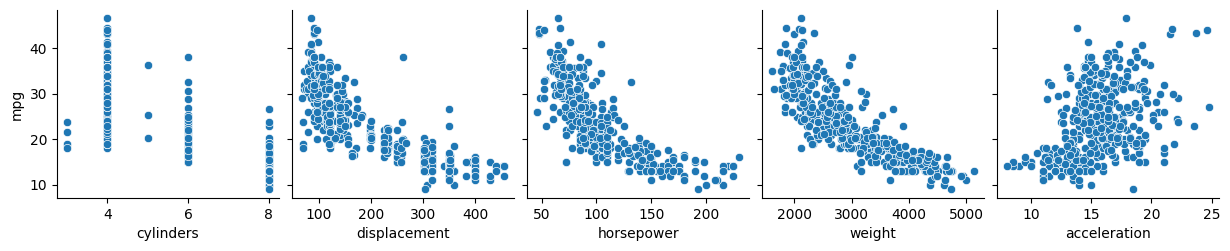

In [76]:
sns.pairplot(mileage,x_vars=[ 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

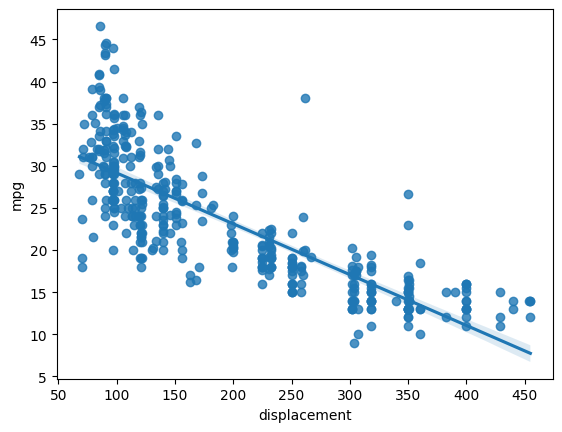

In [77]:
sns.regplot(x='displacement',y='mpg',data=mileage)

# Define TARGET variable(Y) and feature variable(x)

In [78]:
y=mileage['mpg']
x=mileage.drop(['mpg','name','model_year','origin'],axis=1)

In [79]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5
2,8,318.0,150.0,3436,11.0
3,8,304.0,150.0,3433,12.0
4,8,302.0,140.0,3449,10.5


#Scaling Data

In [80]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.49819126,  1.0906037 ,  0.66919608,  0.63086987, -1.29549834],
       [ 1.49819126,  1.5035143 ,  1.58659918,  0.85433297, -1.47703779],
       [ 1.49819126,  1.19623199,  1.19342642,  0.55047045, -1.65857724],
       ...,
       [-0.85632057, -0.56103873, -0.53653371, -0.79858454, -1.4407299 ],
       [-0.85632057, -0.70507731, -0.66759129, -0.40841088,  1.10082237],
       [-0.85632057, -0.71467988, -0.58895674, -0.29608816,  1.39128549]])

In [81]:
pd.DataFrame(x).describe()

,0,1,2,3,4
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-3.570567e-17,-1.785283e-17,1.785283e-16,-1.606755e-16,-2.677925e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.532571e+00,-1.604943e+00,-2.747814e+00
25%,-8.563206e-01,-8.563178e-01,-7.462258e-01,-8.828266e-01,-6.328794e-01
50%,-8.563206e-01,-4.314040e-01,-2.482070e-01,-1.973624e-01,-2.472221e-02
75%,1.498191e+00,6.584879e-01,5.381385e-01,7.538337e-01,5.834349e-01
max,1.498191e+00,2.511784e+00,3.290348e+00,2.565185e+00,3.351912e+00


After standardization mean is zero and standard deviation is one

#Train test split

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((278, 5), (120, 5), (278,), (120,))

#Model prediction

**Decesion Tree Regressor **

In [83]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion="absolute_error",max_depth=10,min_samples_split=10,random_state=5)

#predict test data

In [84]:
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_split=10, random_state=5)

In [85]:
y_pred=model.predict(x_test)

In [86]:
y_pred

array([13.  , 32.  , 16.  , 20.5 , 37.2 , 26.  , 18.  , 15.  , 13.  ,
       23.  , 32.  , 18.  , 37.2 , 15.5 , 21.25, 15.5 , 20.5 , 34.55,
       14.  , 13.  , 13.  , 32.  , 24.  , 15.5 , 17.3 , 20.5 , 27.  ,
       37.2 , 12.  , 25.1 , 12.  , 28.05, 30.  , 15.  , 15.  , 19.  ,
       14.  , 21.6 , 37.3 , 37.2 , 24.  , 30.  , 28.  , 23.4 , 19.  ,
       21.6 , 21.25, 38.6 , 19.  , 23.4 , 23.  , 13.  , 19.95, 34.55,
       16.  , 15.  , 30.  , 28.05, 18.  , 34.1 , 20.5 , 23.75, 18.  ,
       16.  , 32.  , 18.  , 24.  , 18.  , 16.  , 26.  , 15.  , 13.  ,
       28.05, 32.  , 13.  , 24.  , 14.  , 34.55, 23.  , 18.  , 15.  ,
       23.  , 17.5 , 12.  , 21.6 , 15.  , 28.  , 23.4 , 15.5 , 28.05,
       27.  , 25.  , 27.  , 16.5 , 28.  , 18.  , 28.  , 37.2 , 21.6 ,
       14.  , 18.  , 14.  , 30.  , 38.6 , 16.  , 23.4 , 24.  , 28.05,
       17.3 , 13.  , 43.4 , 25.  , 13.  , 28.  , 24.  , 12.  , 28.  ,
       17.5 , 32.  , 17.3 ])

#model Evaluation

In [87]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [88]:
mean_absolute_percentage_error(y_test,y_pred)

0.13483303090856816

In [89]:
r2_score(y_test,y_pred)

0.7014780151005755

#**Explaination**

An R2 score of 0.71 indicates that the model explains 71% of the variation in the outcome variable. This is a fairly good score, but there is still room for improvement. The accuracy of 87% means that the model correctly predicts the outcome 87% of the time.
Overall, the car mileage prediction model in this case is accurate, but it is still better than a random guess. There are a number of things that could be done to improve the accuracy of the model, such as increasing the size and diversity of the dataset, adding more features to the model, or using a more complex model


